## Random Sampling

Random integer generators are useful for sampling from a discrete structure.
Python provides the `randint` function from its `random` module.

In [2]:
from random import randint

Let us create a list of 1000 random numbers from 0 to 9 (both ends included).
Each integer is equally likely to be selected.

In [21]:
L = [randint(0,9) for i in range(1000)]

We can examine the frequencies of the numbers generated.
We expect each of the integers 1 to 10 to occur about 100 times.
However, randomness will imply a certain amout of variation.

(array([117.,  94., 104., 105.,  82.,  89.,  95., 118., 112.,  84.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

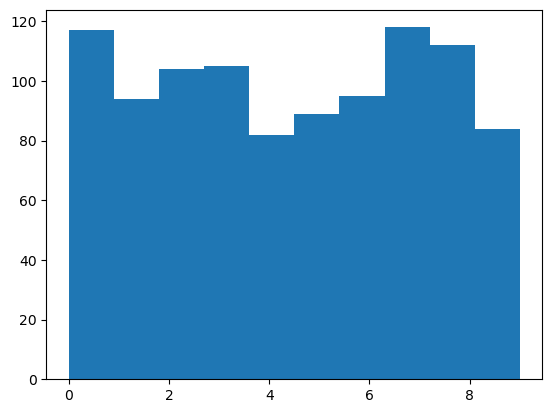

In [25]:
from matplotlib.pyplot import hist
hist(L)

## A general purpose algorithm for sampling from a finite set

The `randint` function can be used to sample randomly from any finite set as follows:

1. Create a list containing all the elements of the finite set.
2. Let `n` be the length of the list.
3. Choose a random integer `i` between 0 and n-1.
4. Return the element of the list with index `i`.

In [3]:
def random_element(L):
    L = list(L) # in case L is some iterable that is not a list
    n = len(L)
    i = randint(0,n-1)
    return L[i]

Let us try this out on our [generator for binary sequences](generator:binary-sequences) 

In [4]:
def binary_sequences(n):
    if n == 0:
        yield []
    else:
        for seq in binary_sequences(n-1):
            yield seq + [0]
            yield seq + [1]

to generate a random binary sequence of length three:

In [5]:
random_element(binary_sequences(3))

[0, 0, 1]

This algorithm does not require any understanding of the set being sampled from; all you need is an iterator.
The downside is that you must generate all the elements of the set and store them in a list before you get a sample.

For this reason, the algorithm will not work for very long binary sequences.
(exercise:hundred-bits)=
```{Exercise}
    How many binary sequences of length 100 are there?
    Assuming that each such sequence (consisting of 100 bits) takes 15 bytes to store, how many gigabytes will you need in order to generate and store all such sequences?
```
In the next chapter we will see how the idea of statiscal independence can be used to generate a random sample from the set of binary sequences of length 100 very fast, using very little memory. 